In [1]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=6a267e75cefa86ccafe08cf4260d7e645cbbd3842fb259842cded0e15d0ee247
  Stored in directory: /Users/jchap/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tqdm as tqdm 
import progressbar 
from time import sleep

VADER Sentiment Analysis :
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [3]:
# making a function to print sentiments of the sentence 

def sentiment_scores(sentence):
    
    #creating a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    
    #polarity_scores method of SentimentIntensityAnalyzer object gives sentiment dictionary
    #dictionary contains pos, neg, neu, and compound scores.
    
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    print('Overall sentiment dictionary is: ', sentiment_dict)
    print('Sentence was rates as ', sentiment_dict['neg']*100,'% Negative')
    print('Sentence was rates as ', sentiment_dict['neu']*100,'% Neutral')
    print('Sentence was rates as ', sentiment_dict['pos']*100,'% Positive')
    
    print('Sentence Overall Rated As ', end ='')
    
    #decide sentiment as positive, negative, and neutral
    if sentiment_dict['compound']>= 0.05: 
        print('Positive')
        
    elif sentiment_dict['compound'] <= -0.05:
        print('Negative')
        
    else: 
        print('Neutral')


In [4]:
df = pd.read_csv('Cleaned_dataset_v1.csv')

* Let's try to use Vader Sentiment on an obviously negative tweet to see how well it works 

In [5]:
sentiment_scores('@lyft,  hey I missed my flight today. I reserved a car days in advance and it never showed up at 4:30am.  No notice or any customer service line. I was stranded and worried that I‚Äôd miss a funeral. What a lousy system. I‚Äôm done with Lyft.  Hello Uber !  #disappointed @lyft #lyft')

Overall sentiment dictionary is:  {'neg': 0.284, 'neu': 0.716, 'pos': 0.0, 'compound': -0.942}
Sentence was rates as  28.4 % Negative
Sentence was rates as  71.6 % Neutral
Sentence was rates as  0.0 % Positive
Sentence Overall Rated As Negative


* The tweet above was clearly a negative review of Lyft but Vader Sentiment gave only gave a 28.4% rating for negativity... worried about how this would perform on a less obvious tweet. Still got an overall rating of negative due to compound score, going to try out some other sentences

In [6]:
sentiment_scores('#uberdriver very dishonest- charged 3.38 miles for a 0.77 mile, 4 minute ride along with surcharges. He started the charges from the airport which we were never at the airport. Post $8 as the charge left the ride and got charged $17.93#uber #dishonest #switchtoLyft https://t.co/QzviwVg1tY')

Overall sentiment dictionary is:  {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.9131}
Sentence was rates as  25.5 % Negative
Sentence was rates as  74.5 % Neutral
Sentence was rates as  0.0 % Positive
Sentence Overall Rated As Negative


In [7]:
sentiment_scores('Get your first #Uber ride #FREE (up to $20) with invite code aaront3765ue. Enjoy! üòä  Download the App ‚ñ∫ https://t.co/x2Sl4E0EGP')

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8557}
Sentence was rates as  0.0 % Negative
Sentence was rates as  64.4 % Neutral
Sentence was rates as  35.6 % Positive
Sentence Overall Rated As Positive


In [8]:
sentiment_scores('I completely agree with you. Once you have ordered and paid and left clear instructions, it is BS that the driver can keep your food and you get charged. @UberEats should be reported to the BBB and the Attorney General for your state each time this happens to a customer. #Uber https://t.co/FhBWhHDHUm')

Overall sentiment dictionary is:  {'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'compound': 0.5563}
Sentence was rates as  3.2 % Negative
Sentence was rates as  87.2 % Neutral
Sentence was rates as  9.6 % Positive
Sentence Overall Rated As Positive


* This tweet seems to be incorrectly rated -- should be a Negative label 

In [9]:
sentiment_scores('Teen girl bludgeons #Uber driver to #death, #police find her by ‚Äòfollowing bloody trail‚Äô to backyard: DA')

Overall sentiment dictionary is:  {'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.7943}
Sentence was rates as  32.0 % Negative
Sentence was rates as  68.0 % Neutral
Sentence was rates as  0.0 % Positive
Sentence Overall Rated As Negative


Let's start creating a column with our sentiment scores and another column with our sentiment results 

* Got a rejection when running the analyzer "Float object is not iterable" -- going to check if data saved to CSV file incorrectly 

In [10]:
df.isnull().sum()

Unnamed: 0      0
Datetime       41
Tweet ID       41
Text           82
Username      123
Language      123
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0    0
Datetime      0
Tweet ID      0
Text          0
Username      0
Language      0
dtype: int64

* Data showed null values in the dataset -- I had checked this during my EDA process and it showed no missing values -- not sure if these were created when saving the new csv file. I dropped the missing values and continued

In [13]:
analyzer = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = [analyzer.polarity_scores(x)['compound'] for x in df['Text']]

In [14]:
conditions = [(df['Sentiment_Score']>=0.05),(df['Sentiment_Score']<= -0.05),(df['Sentiment_Score']>-0.05)&(df['Sentiment_Score']<0.05)]

values = ['Positive','Negative','Neutral']

df['Sentiment'] = np.select(conditions,values)

In [15]:
df.head()

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
0,0,2021-07-27 23:23:08+00:00,1420162870101241856,@Uber_Canada #uber so you tell me I have a dis...,berthorny,en,-0.5859,Negative
1,1,2021-07-27 23:02:19+00:00,1420157632476745728,Life in prison for man in killing of South Car...,upstractcom,en,-0.9512,Negative
2,2,2021-07-27 23:00:52+00:00,1420157266658054151,"“Following the pandemic-led lockdowns, America...",badgerinstitute,en,-0.4215,Negative
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no des...,RafaelAntun,en,0.6597,Positive
4,4,2021-07-27 22:39:35+00:00,1420151910905040896,@SkyNews Can govt start policing companies tha...,peaceandprotect,en,-0.3466,Negative


In [16]:
df['Sentiment'].value_counts()

Positive    14102
Negative     9524
Neutral      6747
Name: Sentiment, dtype: int64

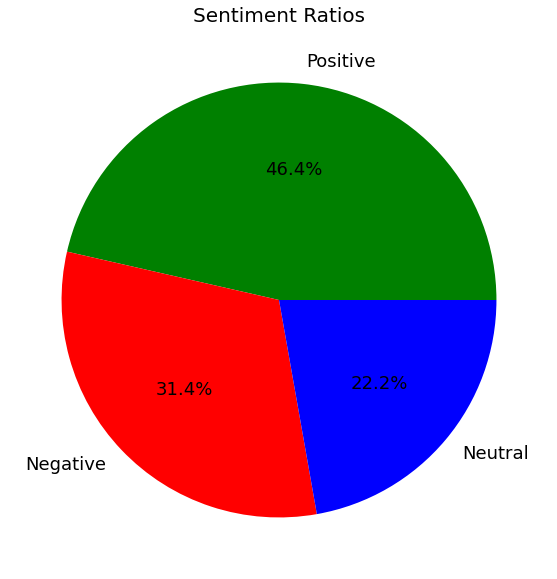

In [17]:
# Let's visualize these results in a piechart 
values = df['Sentiment'].value_counts()
labels = ['Positive','Negative','Neutral']
colors = ['Green','Red','Blue']

plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'fontsize':18})
plt.title('Sentiment Ratios', fontsize=20)
plt.show()

The good news is that the sentiment is majority Positive, I want to break the dataframe apart again to look at Lyft sentiment and Uber sentiment separately 

In [18]:
Uber = df.loc[df['Text'].str.contains('Uber',case=False)]
Lyft = df.loc[df['Text'].str.contains('Lyft',case=False)]

In [19]:
Uber['Sentiment'].value_counts()

Positive    12723
Negative     8664
Neutral      6045
Name: Sentiment, dtype: int64

In [20]:
Lyft['Sentiment'].value_counts()

Positive    3491
Negative    2289
Neutral     1725
Name: Sentiment, dtype: int64

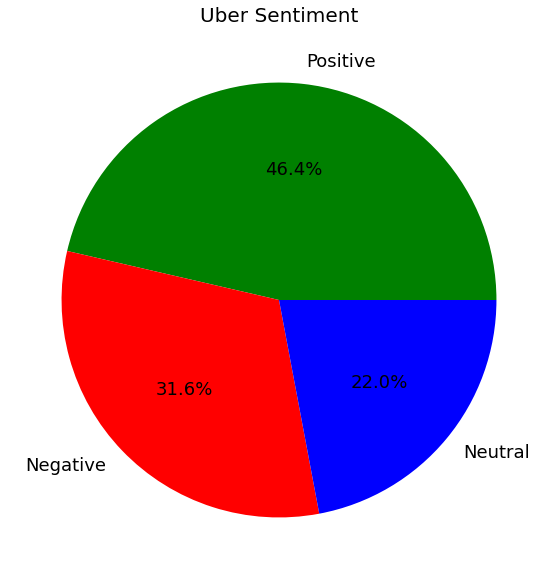

In [21]:
#Pie Charts 

values= Uber['Sentiment'].value_counts()
labels = ['Positive','Negative','Neutral']
colors = ['Green', 'Red', 'Blue']

plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'fontsize':18})
plt.title('Uber Sentiment',fontsize=20)
plt.show()

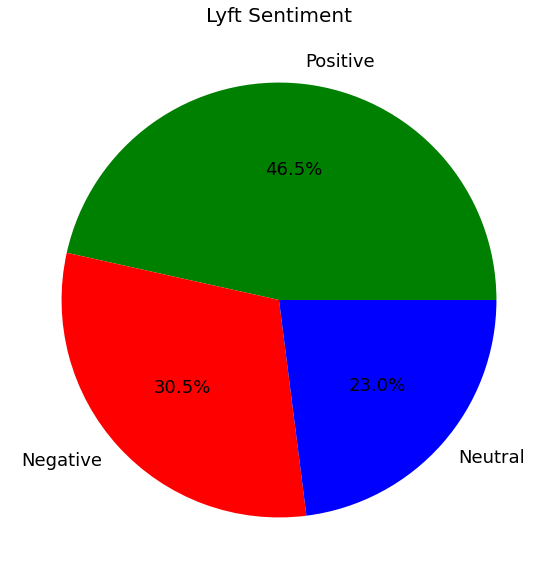

In [22]:
values = Lyft['Sentiment'].value_counts()
labels = ['Positive','Negative','Neutral']
colors = ['Green','Red','Blue']

plt.figure(figsize=(10,10))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'fontsize':18})
plt.title('Lyft Sentiment',fontsize=20)
plt.show()

Overall, the percentages do not change very much -- even after separating the Lyft from the Uber results. 

Combined DataFrame: 

   * Positive: 46.4%
   * Negative: 31.4% 
   * Neutral: 22.2%
    
Uber Only: 
    
   * Positive: 46.4%
   * Negative: 31.6% 
   * Neutral: 22.0% 
    
Lyft Only: 
    
   * Positive: 46.5% 
   * Negative: 30.5% 
   * Neutral: 23.0% 
 

Let's build a wordcloud from the Text columns 

In [23]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [24]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

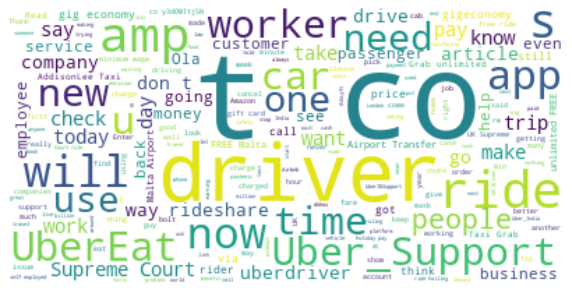

In [25]:
text = "".join(tweet for tweet in df.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

This world cloud doesn't show us too much, let's make one for both Uber and Lyft specific dataframes and then break them apart into Positive and Negative for each as well

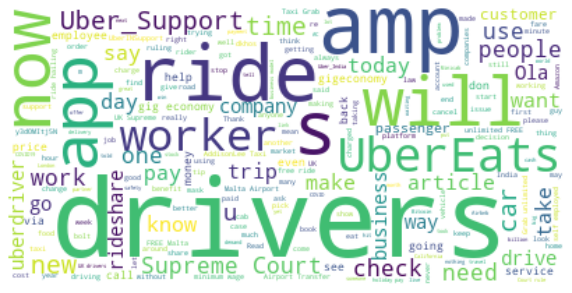

In [26]:
text = "".join(tweet for tweet in Uber.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','driver','UberEat','t','co'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

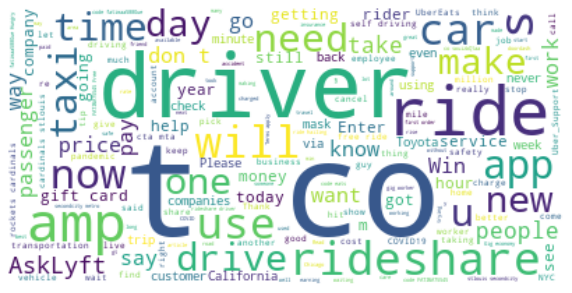

In [27]:
text = "".join(tweet for tweet in Lyft.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
Uber_pos = df.loc[df['Sentiment'] == 'Positive']
Lyft_pos = df.loc[df['Sentiment'] == 'Positive']
Uber_neg = df.loc[df['Sentiment'] == 'Negative']
Lyft_neg = df.loc[df['Sentiment'] == 'Negative']

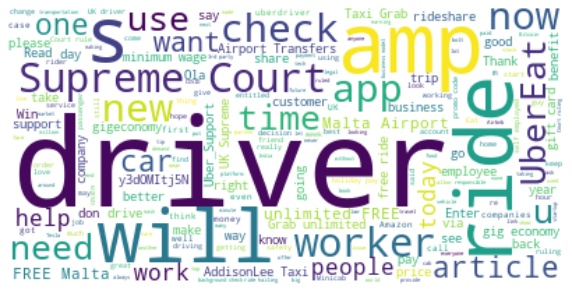

In [29]:
text = "".join(tweet for tweet in Uber_pos.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

What I notice from the Positive Uber wordcloud: 

* The fact that driver is discussed so much must mean people are having positive interactions with drivers 
* Free shows a couple times, seems like a given -- people love free stuff. 
* Interested in why Supreme Court is so big... will have to look into that more 
* Want to look into tweets discussing airport transfers as well, interested in seeing why those are so positive 
* Why is the malta airport being mentioned multiple times? 

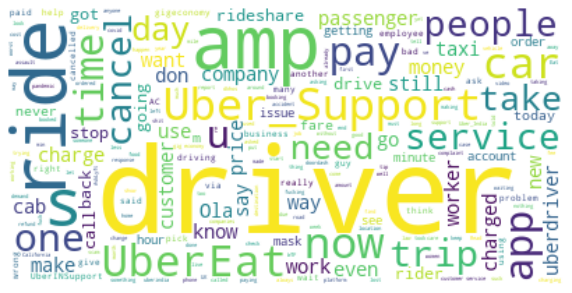

In [30]:
text = "".join(tweet for tweet in Uber_neg.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','will'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

What I noticed from the Uber Negative WordCloud: 

* driver shows pretty large here as well, could look deeper into the issues here 
* Uber_Support shows large, probably because people are reaching out seeking help regarding an issue 
* Cancel is large here as well, is this about drivers cancelling on riders or the other way around? 

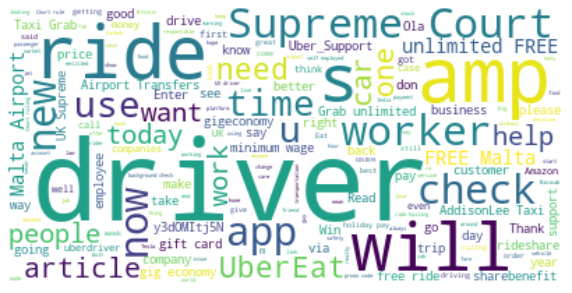

In [31]:
text = "".join(tweet for tweet in Lyft_pos.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

What I noticed from the Lyft Positive WordCloud:

* driver is also pretty large here 
* Supreme Court appears again and even larger 
* Free shows again, no surprise 
* mention of the app -- could mean people are pleased with the app 
* Malta airport appears again 
* want to look into what the context of "app" is 


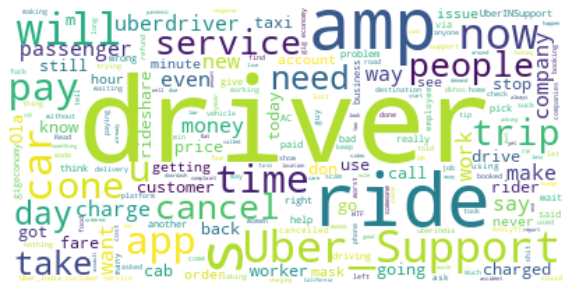

In [32]:
text = "".join(tweet for tweet in Lyft_neg.Text)
stopwords = set(STOPWORDS)
stopwords.update(['https','Uber','Lyft','t','co','UberEat','UberEats'])

wordcloud = WordCloud(stopwords=stopwords,background_color = 'white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

What I noticed from the Lyft negative WordCloud:

* Uber_Support is showing up as frequently mentioned, this leads me to believe people are having more issues with Uber and just tagging or mentioning Lyft in the same tweet 
* interesting that Lyft support is not part of this wordcloud -- the lyft version of this is called AskLyft on twitter
* I removed UberEats from the wordcloud even though it was showing as frequently mentioned because Lyft does not offer a similar service and it seems irrelevant to compare the two 

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

## Uber Positive 

In [48]:
# let's look more into specifics of these wordcloud results 

Uber_driver_pos = Uber_pos.loc[Uber_pos['Text'].str.contains('driver')]
Uber_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,0.6597,Positive
21,23,2021-07-27 19:58:07+00:00,1420111278433914880,@UberINSupport Now kindly issue a directive to your driver's to take the toll road instead of the begur road.\nPassengers are willing to pay the 60 rupees toll on top of 1200 rupees they're already being charged to be home safely.\n\n#uber\n#ola you can follow suite\n#bangalore,asingh2411,en,0.7184,Positive
52,54,2021-07-27 15:48:01+00:00,1420048335851778048,*11:24pm drives person to destination*\n\nme: ok here’s the spot.\nhim: ok so .. do you want to hang out?\nme: i’m working.\nhim: just turn off the app???????\n\n🙄\n\n#lyft #uber #rideshare #uberdriver #lyftdriver #taxi #driver #ridesharing #travel #ridesharedriver #ride #entrepreneur,lady_lyft_,en,0.6868,Positive
59,61,2021-07-27 15:02:33+00:00,1420036895443144708,"For all the #Uber drivers out there… if we get quiet while you’re spouting off your crazy #COVID19 conspiracy theories, know that we definitely don’t agree with you, we’re just being polite because we want to get to our destination alive.",ejhaugan,en,0.3182,Positive
74,77,2021-07-27 12:57:15+00:00,1420005361260564480,I got on an #Uber this morning and the driver literally kept saying I was Filipino after I told him I was not and he kept saying his ex was Filipino. When I told him I was engaged he continued to say I had a fat face and fat nose. #Sexualharassment ?? Do better Uber. #NJ #Affzal,ZorinRobin,en,0.7149,Positive
94,99,2021-07-27 09:58:18+00:00,1419960326397710341,Guess the uber driver wasn’t keen lmao #uber https://t.co/hu3oHskNQ5,RayInTheCity88,en,0.7693,Positive
101,106,2021-07-27 07:46:00+00:00,1419927034415906817,"After lockdown, I could see some major issues with cab drivers.They were accepting the ride only if it s a cash mode of payment &amp; cancelling the ride if prime model car s selected 4 hatchbacks rate.These question the safety of women whn they book cab n an emergency.#OLA #Uber",JeyaprabhaJesl1,en,0.5574,Positive
158,165,2021-07-26 18:08:08+00:00,1419721211043516416,"He wanted to be the pastor of a church, but ended up being an #Uber and #Lyft driver. Yet he feels this is exactly where God wants him. His ""church"" turned out to be on wheels and he sees his congregation one person at a time https://t.co/Zy9kM0aTnL @uber @lyft @pastors https://t.co/iDvwiYMRWq",thechristianhrt,en,0.3919,Positive
170,177,2021-07-26 15:30:05+00:00,1419681438107013121,Any other #uber #uberdriver feel like they're put into a delay after certain amount of trips or money is made within 6 hours? #rideshare,rockstarmaxey,en,0.3744,Positive
196,204,2021-07-26 12:30:01+00:00,1419636122305564676,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/DCnDrNKSYC",TNM_Accountants,en,0.1220,Positive


* First thing I notice here is that a majority of these tweets should be labeled as Negative -- can't determine any reason for positive sentiment if the tweets are inherently negative.   

In [49]:
Uber_driver_pos = Uber_pos.loc[Uber_pos['Text'].str.contains('Supreme Court')]
Uber_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
196,204,2021-07-26 12:30:01+00:00,1419636122305564676,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/DCnDrNKSYC",TNM_Accountants,en,0.1220,Positive
804,835,2021-07-21 17:19:11+00:00,1417896953359253509,"The fifth briefing looked at the UK Supreme Court's decision in the #AslamvsUber case, which categorized Uber drivers as ""workers,"" an intermediate category between ""employees"" and ""self-employed."": https://t.co/pO0Z8ZIaHH\n#EmploymentLawUK #workersrights #Uber #UK #SupremeCourt",fgvcepi,en,0.5574,Positive
1898,1956,2021-07-12 12:30:04+00:00,1414562703239258117,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/x3ZbDICW3b",TNM_Accountants,en,0.1220,Positive
3523,3809,2021-06-28 12:30:01+00:00,1409489260399431683,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/H1FesPgJ91",TNM_Accountants,en,0.1220,Positive
4106,4416,2021-06-23 07:13:55+00:00,1407597771637542915,UK Uber drivers: how do you feel about the Supreme Court ruling? | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/UoryUCZZWK,Cab4Now,en,0.8240,Positive
4211,4526,2021-06-22 10:17:13+00:00,1407281513364852742,Webinar: Join Oliver Segal QC and Madeline Stanley on the 8th July for a discussion on the Supreme Court's seminal decision on worker status in Uber BV and others v Aslam and others. #ukemplaw #gigeconomy #Uber\n\nRegister here.\nhttps://t.co/B9BWAyYEj0,OldSqChambers,en,0.7003,Positive
5200,5552,2021-06-14 12:30:02+00:00,1404415834039230470,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/R5qzcLB5iJ",TNM_Accountants,en,0.1220,Positive
6836,8394,2021-05-31 12:30:03+00:00,1399342409528627206,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/ds6qoCnDJE",TNM_Accountants,en,0.1220,Positive
6842,8404,2021-05-31 11:54:42+00:00,1399333513686626306,The UK Supreme Court has decided that drivers engaged by #Uber are workers rather than independent contractors. Will this decision start a domino effect in the #gig economy?\n\nhttps://t.co/nXJfTvXyYG,sog_law,en,0.7430,Positive
7361,9631,2021-05-27 12:23:45+00:00,1397891273806290944,"It is likely that in some countries the #platform companies pressured by the courts and unions (as in the case of UK Supreme Court ruling on workers status of the UK #Uber drivers) will have to pay more attention to workers/contractors' benefits, including access to a pension. https://t.co/n0yeBSoDik",uberisationrrr,en,0.5994,Positive


* The mentioning of the Supreme Court makes sense -- not sure that any of these tweets are truly Positive but this does introduce another interesting idea that this project could be used for in the future. It would be a good way to understand how the public is feeling about a specific bill or law being introduced and predict how the country would vote. 

In [51]:
Uber_driver_pos = Uber_pos.loc[Uber_pos['Text'].str.contains('Airport Transfers')]
Uber_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
395,414,2021-07-24 19:14:07+00:00,1419013039219695617,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
699,725,2021-07-22 13:13:39+00:00,1418197551786962944,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
792,823,2021-07-21 19:14:04+00:00,1417925863564251141,Workers are again learning the power of collectivism | Torsten Bell | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/1DI6UUf6Kb,Cab4Now,en,0.6166,Positive
879,911,2021-07-21 01:14:12+00:00,1417654107972804611,The Guardian view on public sector jobs: keep gig economics out | Editorial | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/Ohm5jdfvcV,Cab4Now,en,0.6166,Positive
979,1013,2021-07-20 07:14:40+00:00,1417382432995749894,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1076,1110,2021-07-19 13:15:38+00:00,1417110887840698370,"Uber to pay UK drivers minimum wage, holiday pay and pension | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMIKTXl or check out the article https://t.co/CBCSKIHqD0",Cab4Now,en,0.6863,Positive
1140,1177,2021-07-18 19:15:59+00:00,1416839184556376065,"Gig economy couriers should be eligible for a pension, says UK regulator | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/QZfveXp0h3",Cab4Now,en,0.6166,Positive
1208,1244,2021-07-18 01:15:40+00:00,1416567312740765698,Uber agrees union recognition deal with GMB | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/zX0nZ7LRo8,Cab4Now,en,0.7291,Positive
1300,1340,2021-07-17 07:18:47+00:00,1416296306683879429,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1479,1524,2021-07-15 19:14:15+00:00,1415751584206802946,Uber accused of using ‘loaded questions’ in drivers survey | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/kAxeJPStF8,Cab4Now,en,0.3695,Positive


* None of these tweets are actually related to Airport Transfers, they're just tagged in a mass tagging at the end of each tweet -- something about unlimited free malta airport transfers from a certain link. 

In [52]:
Uber_driver_pos = Uber_pos.loc[Uber_pos['Text'].str.contains('Malta Airport')]
Uber_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
395,414,2021-07-24 19:14:07+00:00,1419013039219695617,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
699,725,2021-07-22 13:13:39+00:00,1418197551786962944,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
792,823,2021-07-21 19:14:04+00:00,1417925863564251141,Workers are again learning the power of collectivism | Torsten Bell | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/1DI6UUf6Kb,Cab4Now,en,0.6166,Positive
879,911,2021-07-21 01:14:12+00:00,1417654107972804611,The Guardian view on public sector jobs: keep gig economics out | Editorial | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/Ohm5jdfvcV,Cab4Now,en,0.6166,Positive
979,1013,2021-07-20 07:14:40+00:00,1417382432995749894,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1076,1110,2021-07-19 13:15:38+00:00,1417110887840698370,"Uber to pay UK drivers minimum wage, holiday pay and pension | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMIKTXl or check out the article https://t.co/CBCSKIHqD0",Cab4Now,en,0.6863,Positive
1140,1177,2021-07-18 19:15:59+00:00,1416839184556376065,"Gig economy couriers should be eligible for a pension, says UK regulator | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/QZfveXp0h3",Cab4Now,en,0.6166,Positive
1208,1244,2021-07-18 01:15:40+00:00,1416567312740765698,Uber agrees union recognition deal with GMB | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/zX0nZ7LRo8,Cab4Now,en,0.7291,Positive
1300,1340,2021-07-17 07:18:47+00:00,1416296306683879429,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1479,1524,2021-07-15 19:14:15+00:00,1415751584206802946,Uber accused of using ‘loaded questions’ in drivers survey | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/kAxeJPStF8,Cab4Now,en,0.3695,Positive


* Again, free aiport transfers from the malta airport with a specific link. 

In [53]:
Uber_driver_pos = Uber_pos.loc[Uber_pos['Text'].str.contains('amp')]
Uber_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
15,17,2021-07-27 20:44:49+00:00,1420123029435260937,There's a fundamental shift happening in company's procurement strategy.\nUber Freight's Joe Shone shares his expert opinion on the shift happening post #COVID &amp; on #Uber debuting their integration with PCS. Attend his session at #Ignite2021 here: https://t.co/U7anQWHPfe https://t.co/GmfBwoyBkt,PCSsoftware,en,0.2960,Positive
25,27,2021-07-27 19:00:01+00:00,1420096656029097985,Top 8 Design System Examples https://t.co/GQSkYsWroh\n\n#ux #ui #uxdesign #uidesign #designsystem #productdesign #prototype #userresearch #uxresearch #design #research #webdesign #appdesign #mobile #ios #android #google #apple #uber #shopify #ibm #mailchimp #ixd,Nucleolo_,en,0.2023,Positive
44,46,2021-07-27 16:20:29+00:00,1420056507878625285,"The mistake: “The #opportunity isn’t big enough”\n\nThe truth: #founders often MAKE the opportunity big enough \nYour initial #market, isn’t your final market\n\nExample: #Uber began as a black car service for people in SF\n“Small market”\nPoint: #startups are a game of:Crawl. Walk. Run",RihabBousnina1,en,0.6705,Positive
45,47,2021-07-27 16:08:43+00:00,1420053544644792325,"@sns__12 @TwitterSupport I would like to recommend Johnshawn_tech on Instagram he is a software expert who is skillful when it comes to reactivation of #socialmedia accounts, #uber reactivation, PayPal &amp; Amazon, and other software issues. Give him a Dm today.",gracefidelis_,en,0.6908,Positive
53,55,2021-07-27 15:47:46+00:00,1420048274812293122,Interesting new #Ubereats FAIL @Uber @Ubereats I received notification directly after accepting offer (I know this Marriott well). But the problem is: Custo NOT in Marriott. Why try to help by making us look silly &amp;&amp; #Uber still needs to show EXACT ADDRESS ONCE AND FOR ALL #uber https://t.co/yYGBPvHN7F,DlvryDryvr,en,0.1861,Positive
54,56,2021-07-27 15:46:33+00:00,1420047968888045568,"11. ""Remarkably, most of #Getir’s workers companywide are full-time employees w holiday pay &amp; pensions, as the company has shunned the #gig economy model that has attracted lawsuits to the likes of #Uber &amp; #Deliveroo. But it offers contracts for people who want flexibility....""",loyndsview,en,0.7717,Positive
101,106,2021-07-27 07:46:00+00:00,1419927034415906817,"After lockdown, I could see some major issues with cab drivers.They were accepting the ride only if it s a cash mode of payment &amp; cancelling the ride if prime model car s selected 4 hatchbacks rate.These question the safety of women whn they book cab n an emergency.#OLA #Uber",JeyaprabhaJesl1,en,0.5574,Positive
118,123,2021-07-27 04:30:08+00:00,1419877742334652442,"Why do you think companies like @Uber, @zomato, @netflix &amp; more have been so successful?\n\nIt's because they bring 'Comfort' &amp; 'Convenience' to users and not only because they offer unbelievable services.\n\nThink about it.\n\n#CX #customerexperience #Uber #Zomato #Netflix #UIdesign https://t.co/ShUqnpYiPp",TechticSolution,en,0.8926,Positive
119,124,2021-07-27 04:09:32+00:00,1419872556719362055,"@JaneCaro Trying to get #AZ #2 earlier. Can’t get a GP appointment before mid-August; one #Balmain practice said Sept. Yes, there are hubs. They require #Uber &amp; standing in #queues. For many incl me, not possible. #Hazard needs to accelerate supplies to GPs, FAST. And #MakeMasksMandatory .",stephaniedowric,en,0.4019,Positive
145,152,2021-07-26 20:46:59+00:00,1419761188804644865,@ChanleyCourtTV @CourtTV What a case!!!! Wow! State RESTS. I can’t imagine what the jurors think. It’s so interesting that SC doesn’t provide paper pad &amp; pens to jurors. The juror foreman is chosen by the judge too. #CourtTV #MistakenRideshareMurderTrial #NathanielRowland #UBER #SamanthaJosephson #SC,TheDeniseFolsom,en,0.8576,Positive


* irrelevant to sentiment 

## Uber Negative

In [54]:
Uber_driver_neg = Uber_neg.loc[Uber_neg['Text'].str.contains('driver')]
Uber_driver_neg.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,-0.2500,Negative
20,22,2021-07-27 20:00:58+00:00,1420111995815165961,Nothing like feeling like #Uber is limiting my rides... Patterns paint a dirty picture. So apparently after making $150+ they start giving me 1 rider an hour. Who else experiences this!? #uberdriver,rockstarmaxey,en,-0.6577,Negative
40,42,2021-07-27 16:32:48+00:00,1420059608970846210,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber I waited for 30 minutes at the street. #horrible #taxi #driver,fofofairy,en,-0.7151,Negative
55,57,2021-07-27 15:45:51+00:00,1420047791514996737,Booking a cab never looked easier!\n\n#uxdesigner #ultimateuiux #uxdesigner #uxdesign #uiuxdesign #uxinspiration #uxdesigner #uiuxdesigner #designtips #appdesign #uxinspiration #designtools #uber #ubertaxi #taxi #taxidriver #ola #smartwatch #applewatch #applewatchseries5 #uiux #ux https://t.co/lR58qFvC0h,StudioAbt,en,-0.3867,Negative
57,59,2021-07-27 15:11:42+00:00,1420039198388539393,"@UberINSupport I don’t see any thred u r wrong if it’s not money you think , it’s about time , your drivers little scam , and your routine scam or #uber #uberscam ,",faiyaz_a_khan,en,-0.8809,Negative
61,63,2021-07-27 14:34:52+00:00,1420029928813236227,Now I understand why there's no #uber drivers .. There @Uber_Support is bad.,Gsxr14s,en,-0.6908,Negative
63,65,2021-07-27 14:29:16+00:00,1420028517803302921,"Extremely disappointed with #uber scheduled service-booked a week in advance, but driver did not show up, also did not cancel, no apologies were made, no customer service to reach out to. #uber failed us big time. Recommend against scheduling service with #uber. #chaos @Uber",mocancem,en,-0.8602,Negative
67,69,2021-07-27 14:10:33+00:00,1420023807776075778,"@Uber u ass holes ur drivers started trip without me &amp; u fuckers have debit my wallet , m gonna promote paid ads #uberscam #UberGo #Uber #uninstall Uber \nYou spoiled my time , \n\nDM me for every uninstall Uber App and every negative review on Uber play store or iOS will pay Rs 10",faiyaz_a_khan,en,-0.8169,Negative
80,83,2021-07-27 12:21:07+00:00,1419996269926227975,#Uber driver with auto OD33C1091 misbehaved because we denied to pay extra 15 rupees above the charge.If someone cancels the uber then he has to pay 15 rupees.Its a trap.,amitparidabick1,en,-0.8591,Negative
81,84,2021-07-27 12:01:01+00:00,1419991212887523328,Uber and Deliveroo drivers protest over hundreds of ‘unfair’ dismissals | #uber #workers #gigeconomy https://t.co/FgbNisL3vM,LTDAtaxinews,en,-0.2500,Negative


* These make much more sense. All negative tweets about interactions with uber due to drivers or not having enough drivers

In [55]:
uber_cancel_neg = Uber_neg.loc[Uber_neg['Text'].str.contains('Cancel')]
uber_cancel_neg.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
1273,1312,2021-07-17 12:24:59+00:00,1416373362536898560,#Uber PT 2… Then You Have Drivers Talking About They Can’t Take You After They Have Already Taken Your Call And They Want You To Cancel The Call Knowing Damn Well That You’re Going To Get Charged $10 For Cancelling. Then You Get Charged For Even Using The Uber Help Tab?! WTF 😡,Regii_19,en,-0.8314,Negative
1335,1376,2021-07-16 21:32:02+00:00,1416148647314698241,How to avoid Uber's Cancellation Fee! \n\nhttps://t.co/fE93vpWeZC\n\n#Uber #UberFees https://t.co/jND6vnXLBW,ride_guru,en,-0.3595,Negative
2426,2522,2021-07-07 13:45:40+00:00,1412769790217752585,*Me books an @Uber *\n\nDriver : Drop Ekkada madam?\nMe: Manikonda Anna\nDriver : Ok ostunna madam..\n\n*Silently Cancels the ride* \n\nInfine loop!! \n\n#uber #telugutweets,telugu_ammaaii,en,-0.3365,Negative
2466,2584,2021-07-07 04:02:52+00:00,1412623121144680448,@UberINSupport Cancelled trip after asking fr location? Do you have any policy about minimum distance? Or your drivers are not trained enough #Uber #Online #Transport #India #Delhi https://t.co/uL3PNdSPkX,Debjyoti0047,en,-0.3313,Negative
2686,2919,2021-07-05 03:40:57+00:00,1411892830948282369,The pay scale for @DoorDash &amp; @Uber is completely TRASH\n\nThe way they treat their drivers is borderline CRIMINAL!\n\nTheir customer service agents are all horrible and none of them even speak English.\n#DoorDash #Uber #DoordashSUCKS #UberEatsSUCKS #Cancel,iSoPluggedIn,en,-0.8355,Negative
3543,3831,2021-06-28 08:28:04+00:00,1409428372019564547,So now it has become a norm in mumbai too for #uber drivers to call and ask for destination and then cancel . Cancel the call option given to drivers . Stop harassing us . #uber @Uber @mumbaitraffic @mtptraffic @CMOMaharashtra @Uber_Support @Uber_India,DushKamath,en,-0.8271,Negative
5422,5787,2021-06-12 03:38:16+00:00,1403557234286764034,@lyft Your service is ridiculous. Cancelling rides a minute before arriving after waiting. You should be ashamed. #uber #Rideshare #taxi #chicago,pmshine02,en,-0.7506,Negative
5669,6041,2021-06-10 05:33:32+00:00,1402861469520187392,#Uberindia #Uber Your driver demanded Rs.200 extra. Hence I cancelled. Whi should I be penalized. Cancell the penalty immediately. https://t.co/7BRjDOQ8Ta,sriramvangal,en,-0.7322,Negative
5831,6263,2021-06-09 07:45:44+00:00,1402532348399259649,Do you fine / take actions against the drivers who cancel the trips ? @UberINSupport @Uber_India \nYour drivers are nothing less than Kaali Peeli divers with so much naatak. \nWhy should we pay so much for same “taxi treatment” of “Nahi Jana Hain” \n#Uber #TripCancel,navvyB,en,-0.1531,Negative
8859,13349,2021-05-14 23:13:59+00:00,1393343865080406018,Cancel #Uber get #Lyft. @Uber @lyft https://t.co/sdo6SpEWfT,Free_Ace,en,-0.2500,Negative


* These all seem straight forward also -- negative comments about drivers cancelling 

## Lyft Positive

In [56]:
Lyft_driver_pos = Lyft_pos.loc[Lyft_pos['Text'].str.contains('driver')]
Lyft_driver_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
3,3,2021-07-27 22:50:30+00:00,1420154657696100364,Great security at @iflymia @DHSgov with no designated or enforced @Uber and @lyft areas and #uber #lyft drivers just parking and waiting wherever they please and no @MiamiDadePD in sight @MayorDaniella,RafaelAntun,en,0.6597,Positive
21,23,2021-07-27 19:58:07+00:00,1420111278433914880,@UberINSupport Now kindly issue a directive to your driver's to take the toll road instead of the begur road.\nPassengers are willing to pay the 60 rupees toll on top of 1200 rupees they're already being charged to be home safely.\n\n#uber\n#ola you can follow suite\n#bangalore,asingh2411,en,0.7184,Positive
52,54,2021-07-27 15:48:01+00:00,1420048335851778048,*11:24pm drives person to destination*\n\nme: ok here’s the spot.\nhim: ok so .. do you want to hang out?\nme: i’m working.\nhim: just turn off the app???????\n\n🙄\n\n#lyft #uber #rideshare #uberdriver #lyftdriver #taxi #driver #ridesharing #travel #ridesharedriver #ride #entrepreneur,lady_lyft_,en,0.6868,Positive
59,61,2021-07-27 15:02:33+00:00,1420036895443144708,"For all the #Uber drivers out there… if we get quiet while you’re spouting off your crazy #COVID19 conspiracy theories, know that we definitely don’t agree with you, we’re just being polite because we want to get to our destination alive.",ejhaugan,en,0.3182,Positive
74,77,2021-07-27 12:57:15+00:00,1420005361260564480,I got on an #Uber this morning and the driver literally kept saying I was Filipino after I told him I was not and he kept saying his ex was Filipino. When I told him I was engaged he continued to say I had a fat face and fat nose. #Sexualharassment ?? Do better Uber. #NJ #Affzal,ZorinRobin,en,0.7149,Positive
94,99,2021-07-27 09:58:18+00:00,1419960326397710341,Guess the uber driver wasn’t keen lmao #uber https://t.co/hu3oHskNQ5,RayInTheCity88,en,0.7693,Positive
101,106,2021-07-27 07:46:00+00:00,1419927034415906817,"After lockdown, I could see some major issues with cab drivers.They were accepting the ride only if it s a cash mode of payment &amp; cancelling the ride if prime model car s selected 4 hatchbacks rate.These question the safety of women whn they book cab n an emergency.#OLA #Uber",JeyaprabhaJesl1,en,0.5574,Positive
158,165,2021-07-26 18:08:08+00:00,1419721211043516416,"He wanted to be the pastor of a church, but ended up being an #Uber and #Lyft driver. Yet he feels this is exactly where God wants him. His ""church"" turned out to be on wheels and he sees his congregation one person at a time https://t.co/Zy9kM0aTnL @uber @lyft @pastors https://t.co/iDvwiYMRWq",thechristianhrt,en,0.3919,Positive
170,177,2021-07-26 15:30:05+00:00,1419681438107013121,Any other #uber #uberdriver feel like they're put into a delay after certain amount of trips or money is made within 6 hours? #rideshare,rockstarmaxey,en,0.3744,Positive
196,204,2021-07-26 12:30:01+00:00,1419636122305564676,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/DCnDrNKSYC",TNM_Accountants,en,0.1220,Positive


* A lot of these don't even include tweets about Lyft? -- also labeled incorrectly 

In [57]:
Lyft_app_pos = Lyft_pos.loc[Lyft_pos['Text'].str.contains('app')]
Lyft_app_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
15,17,2021-07-27 20:44:49+00:00,1420123029435260937,There's a fundamental shift happening in company's procurement strategy.\nUber Freight's Joe Shone shares his expert opinion on the shift happening post #COVID &amp; on #Uber debuting their integration with PCS. Attend his session at #Ignite2021 here: https://t.co/U7anQWHPfe https://t.co/GmfBwoyBkt,PCSsoftware,en,0.2960,Positive
25,27,2021-07-27 19:00:01+00:00,1420096656029097985,Top 8 Design System Examples https://t.co/GQSkYsWroh\n\n#ux #ui #uxdesign #uidesign #designsystem #productdesign #prototype #userresearch #uxresearch #design #research #webdesign #appdesign #mobile #ios #android #google #apple #uber #shopify #ibm #mailchimp #ixd,Nucleolo_,en,0.2023,Positive
52,54,2021-07-27 15:48:01+00:00,1420048335851778048,*11:24pm drives person to destination*\n\nme: ok here’s the spot.\nhim: ok so .. do you want to hang out?\nme: i’m working.\nhim: just turn off the app???????\n\n🙄\n\n#lyft #uber #rideshare #uberdriver #lyftdriver #taxi #driver #ridesharing #travel #ridesharedriver #ride #entrepreneur,lady_lyft_,en,0.6868,Positive
77,80,2021-07-27 12:42:00+00:00,1420001523686207489,"To develop an #Uber-like app, we have a pre-built and ready-to-be deployed solution, which has all the required app functionalities such as live map tracking, fare calculation, payments, trip request algo, etc. \nReach out to us to develop #ridehailing app https://t.co/nnZ8polbxy",smartDataIncLtd,en,0.3400,Positive
119,124,2021-07-27 04:09:32+00:00,1419872556719362055,"@JaneCaro Trying to get #AZ #2 earlier. Can’t get a GP appointment before mid-August; one #Balmain practice said Sept. Yes, there are hubs. They require #Uber &amp; standing in #queues. For many incl me, not possible. #Hazard needs to accelerate supplies to GPs, FAST. And #MakeMasksMandatory .",stephaniedowric,en,0.4019,Positive
128,133,2021-07-27 01:39:26+00:00,1419834783283089411,While booking #OLA and #uber there first question is ‘where you want to go’ and CASH payment only or else they will cancel your ride. This is what happening with me and everybody. Please look into this matter. #ola and #uber.,vickyraji0105,en,0.1840,Positive
190,197,2021-07-26 13:45:43+00:00,1419655170078613505,Uber for x App with super smart features to upgrade your business. Build your on-demand app highly customisable and flexible options for your enterprise needs. #UBERCLONE #uber #taxi #cryptocurrency #crypto #btc https://t.co/u465paVw6z https://t.co/OrS8eJZETQ,uberforxapp,en,0.8300,Positive
203,212,2021-07-26 10:45:37+00:00,1419609848010792968,Start your online taxi business with the best app solution. Get our ready-made uber clone app and launch your business in 72 hours. And get a free demo now. Visit https://t.co/KIrTjvpqQb\n.\n#appdevelopment #Uber #uberclone #mobileappdevelopment https://t.co/SLPMfcW8iL,ApporioInfolabs,en,0.8689,Positive
209,218,2021-07-26 09:36:52+00:00,1419592544631988224,@MagdaSzubanski So no troll here…but how do you justify in your heart taking money to do adds for #uber when you should know that it has a criminal past and exploits Australian workers on its platform. If you want real facts contact me and I’d be happy to supply. Love your work apart from this!,Nochemicals4me,en,0.7506,Positive
210,219,2021-07-26 09:32:53+00:00,1419591544227520519,@russellcrowe @russellcrowe Thank God you don’t do adds to support #Uber. So many celebrity Australians happy to take a pay cheque to support a company with a criminal past and that builds its platform on exploiting Australian workers and their rights. stay strong @russellcrowe,Nochemicals4me,en,0.8519,Positive


* I noticed some of these tweets are actually negative comments about the app -- there are also quite a few that hold no sentiment. 

In [58]:
lyft_SC_pos = Lyft_pos.loc[Lyft_pos['Text'].str.contains('Supreme Court')]
lyft_SC_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
196,204,2021-07-26 12:30:01+00:00,1419636122305564676,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/DCnDrNKSYC",TNM_Accountants,en,0.1220,Positive
804,835,2021-07-21 17:19:11+00:00,1417896953359253509,"The fifth briefing looked at the UK Supreme Court's decision in the #AslamvsUber case, which categorized Uber drivers as ""workers,"" an intermediate category between ""employees"" and ""self-employed."": https://t.co/pO0Z8ZIaHH\n#EmploymentLawUK #workersrights #Uber #UK #SupremeCourt",fgvcepi,en,0.5574,Positive
1898,1956,2021-07-12 12:30:04+00:00,1414562703239258117,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/x3ZbDICW3b",TNM_Accountants,en,0.1220,Positive
3523,3809,2021-06-28 12:30:01+00:00,1409489260399431683,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/H1FesPgJ91",TNM_Accountants,en,0.1220,Positive
4106,4416,2021-06-23 07:13:55+00:00,1407597771637542915,UK Uber drivers: how do you feel about the Supreme Court ruling? | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/UoryUCZZWK,Cab4Now,en,0.8240,Positive
4211,4526,2021-06-22 10:17:13+00:00,1407281513364852742,Webinar: Join Oliver Segal QC and Madeline Stanley on the 8th July for a discussion on the Supreme Court's seminal decision on worker status in Uber BV and others v Aslam and others. #ukemplaw #gigeconomy #Uber\n\nRegister here.\nhttps://t.co/B9BWAyYEj0,OldSqChambers,en,0.7003,Positive
5200,5552,2021-06-14 12:30:02+00:00,1404415834039230470,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/R5qzcLB5iJ",TNM_Accountants,en,0.1220,Positive
6836,8394,2021-05-31 12:30:03+00:00,1399342409528627206,"#UBERDRIVERS ARE WORKERS NOT SELF EMPLOYED\n\nSupreme Court has ruled that drivers for #Uber are #workers not #selfemployed individuals and hence are entitled to holiday pay, pension rights &amp; the right to be paid the national #minimumwage. \n\nFind out more- https://t.co/SdJeMozoUl https://t.co/ds6qoCnDJE",TNM_Accountants,en,0.1220,Positive
6842,8404,2021-05-31 11:54:42+00:00,1399333513686626306,The UK Supreme Court has decided that drivers engaged by #Uber are workers rather than independent contractors. Will this decision start a domino effect in the #gig economy?\n\nhttps://t.co/nXJfTvXyYG,sog_law,en,0.7430,Positive
7361,9631,2021-05-27 12:23:45+00:00,1397891273806290944,"It is likely that in some countries the #platform companies pressured by the courts and unions (as in the case of UK Supreme Court ruling on workers status of the UK #Uber drivers) will have to pay more attention to workers/contractors' benefits, including access to a pension. https://t.co/n0yeBSoDik",uberisationrrr,en,0.5994,Positive


* Not a lot of sentiment to these either 

In [59]:
Lyft_Malta_pos = Lyft_pos.loc[Lyft_pos['Text'].str.contains('Malta Airport')]
Lyft_Malta_pos.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
395,414,2021-07-24 19:14:07+00:00,1419013039219695617,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
699,725,2021-07-22 13:13:39+00:00,1418197551786962944,Engineer who stole trade secrets from Google among those pardoned by Trump | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/wh8y7xw5IQ,Cab4Now,en,0.7125,Positive
792,823,2021-07-21 19:14:04+00:00,1417925863564251141,Workers are again learning the power of collectivism | Torsten Bell | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/1DI6UUf6Kb,Cab4Now,en,0.6166,Positive
879,911,2021-07-21 01:14:12+00:00,1417654107972804611,The Guardian view on public sector jobs: keep gig economics out | Editorial | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/Ohm5jdfvcV,Cab4Now,en,0.6166,Positive
979,1013,2021-07-20 07:14:40+00:00,1417382432995749894,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1076,1110,2021-07-19 13:15:38+00:00,1417110887840698370,"Uber to pay UK drivers minimum wage, holiday pay and pension | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMIKTXl or check out the article https://t.co/CBCSKIHqD0",Cab4Now,en,0.6863,Positive
1140,1177,2021-07-18 19:15:59+00:00,1416839184556376065,"Gig economy couriers should be eligible for a pension, says UK regulator | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/QZfveXp0h3",Cab4Now,en,0.6166,Positive
1208,1244,2021-07-18 01:15:40+00:00,1416567312740765698,Uber agrees union recognition deal with GMB | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/zX0nZ7LRo8,Cab4Now,en,0.7291,Positive
1300,1340,2021-07-17 07:18:47+00:00,1416296306683879429,Covid should have been a boon for Deliveroo – but it still hasn’t turned a profit| Jonathan Nunn | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/j7wIYMncns,Cab4Now,en,0.8860,Positive
1479,1524,2021-07-15 19:14:15+00:00,1415751584206802946,Uber accused of using ‘loaded questions’ in drivers survey | #Minicab #Uber #AddisonLee #Taxi\n\nGrab unlimited FREE #Malta Airport Transfers from https://t.co/y3dOMItj5N or check out the article https://t.co/kAxeJPStF8,Cab4Now,en,0.3695,Positive


* These are also just about free malta airport transfers using a specific link

## Lyft Negative

In [60]:
Lyft_driver_neg = Lyft_neg.loc[Lyft_neg['Text'].str.contains('driver')]
Lyft_driver_neg.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
18,20,2021-07-27 20:13:11+00:00,1420115067480289289,$100+ fares and 2-hour wait times: What the #Uber and #Lyft driver shortage means for you https://t.co/bWDVADzG9k,LimoGame,en,-0.2500,Negative
20,22,2021-07-27 20:00:58+00:00,1420111995815165961,Nothing like feeling like #Uber is limiting my rides... Patterns paint a dirty picture. So apparently after making $150+ they start giving me 1 rider an hour. Who else experiences this!? #uberdriver,rockstarmaxey,en,-0.6577,Negative
40,42,2021-07-27 16:32:48+00:00,1420059608970846210,#Uber #captain cancel after picking me up because they refuse credit cards as payment method!! @Uber I waited for 30 minutes at the street. #horrible #taxi #driver,fofofairy,en,-0.7151,Negative
55,57,2021-07-27 15:45:51+00:00,1420047791514996737,Booking a cab never looked easier!\n\n#uxdesigner #ultimateuiux #uxdesigner #uxdesign #uiuxdesign #uxinspiration #uxdesigner #uiuxdesigner #designtips #appdesign #uxinspiration #designtools #uber #ubertaxi #taxi #taxidriver #ola #smartwatch #applewatch #applewatchseries5 #uiux #ux https://t.co/lR58qFvC0h,StudioAbt,en,-0.3867,Negative
57,59,2021-07-27 15:11:42+00:00,1420039198388539393,"@UberINSupport I don’t see any thred u r wrong if it’s not money you think , it’s about time , your drivers little scam , and your routine scam or #uber #uberscam ,",faiyaz_a_khan,en,-0.8809,Negative
61,63,2021-07-27 14:34:52+00:00,1420029928813236227,Now I understand why there's no #uber drivers .. There @Uber_Support is bad.,Gsxr14s,en,-0.6908,Negative
63,65,2021-07-27 14:29:16+00:00,1420028517803302921,"Extremely disappointed with #uber scheduled service-booked a week in advance, but driver did not show up, also did not cancel, no apologies were made, no customer service to reach out to. #uber failed us big time. Recommend against scheduling service with #uber. #chaos @Uber",mocancem,en,-0.8602,Negative
67,69,2021-07-27 14:10:33+00:00,1420023807776075778,"@Uber u ass holes ur drivers started trip without me &amp; u fuckers have debit my wallet , m gonna promote paid ads #uberscam #UberGo #Uber #uninstall Uber \nYou spoiled my time , \n\nDM me for every uninstall Uber App and every negative review on Uber play store or iOS will pay Rs 10",faiyaz_a_khan,en,-0.8169,Negative
80,83,2021-07-27 12:21:07+00:00,1419996269926227975,#Uber driver with auto OD33C1091 misbehaved because we denied to pay extra 15 rupees above the charge.If someone cancels the uber then he has to pay 15 rupees.Its a trap.,amitparidabick1,en,-0.8591,Negative
81,84,2021-07-27 12:01:01+00:00,1419991212887523328,Uber and Deliveroo drivers protest over hundreds of ‘unfair’ dismissals | #uber #workers #gigeconomy https://t.co/FgbNisL3vM,LTDAtaxinews,en,-0.2500,Negative


* Again, not a lot of Lyft specific tweets? But all still negative tweets about drivers

In [61]:
Lyft_Uber_support_neg = Lyft_neg.loc[Lyft_neg['Text'].str.contains('Uber_Support')]
Lyft_Uber_support_neg.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
19,21,2021-07-27 20:04:33+00:00,1420112897737375749,"Like I said, #goodbyeUber! @Uber’s standards are terrible, and their customer service response does nothing to help their passengers. Deleted! No future ride-shares will happen with this company. @Uber_Support #Uber https://t.co/V6Mi96yVsQ https://t.co/wsI95JyM3B",4katiemack,en,-0.6850,Negative
61,63,2021-07-27 14:34:52+00:00,1420029928813236227,Now I understand why there's no #uber drivers .. There @Uber_Support is bad.,Gsxr14s,en,-0.6908,Negative
87,90,2021-07-27 11:22:30+00:00,1419981519175655425,Are you going to do something about it or\nshould I consider that you are #Cheating your #customers?\n#Uber #Uber_India #UberlNSupport\n@Uber_India @Uber_Support\n@UberlNSupport #consumerprotection #JagoGrahakJago #IndianConsumer\n@consumerforum_ @jagograhakjago https://t.co/B20kZhq2GT,omkaareshwar,en,-0.5574,Negative
91,96,2021-07-27 10:51:48+00:00,1419973790142980098,@Uber I think uber drivers (at least in france) found a way to make 6€without completing the trips .they just cancel when they arrive\nThis mounth 2 driversdrove by me without stopping cancelled and I was charged for the cancellation ! @Uber_Support #uber,Billy0Joe,en,-0.2283,Negative
96,101,2021-07-27 09:44:38+00:00,1419956888322588688,@Uber_Support No help. #uber https://t.co/sJ5YgcvBRO,AlhanoofSR,en,-0.3089,Negative
100,105,2021-07-27 07:50:19+00:00,1419928121265070080,@Uber_Support Tried using this page. Why is there no phone number? #uber #hidingfromcustomers #nocustomerservice,marksmccarthy7,en,-0.3447,Negative
162,169,2021-07-26 17:13:07+00:00,1419707367072145416,"@Uber_Support my daughter told me, onTuesday 7/20 at 10 pm in Montclair NJ, driver made my daughter get out of the car saying he not allowed to go to NYC.\nHow he leave a young girl in the middle of the street late at night? @Uber @Olympics @TeamUSA @NBCOlympics #uber Manhattan",BFTano5,en,-0.0516,Negative
178,185,2021-07-26 14:54:08+00:00,1419672390414569473,Why is one of America Biggest Companies Customers Service Overseas 🤔 #uber @Uber_Support #Rideshare they have no clue what they are doing saying they waiting on @checkr &amp; check reports are already done,OUTSPOKEN_Nazi,en,-0.2960,Negative
181,188,2021-07-26 14:44:02+00:00,1419669847626104843,"@checkr @Uber_Support are the worst &amp; are really out here causing financial Harm to people lives, #bbb #share #Rideshare #Independentcontractors #uber #overseasjobs",OUTSPOKEN_Nazi,en,-0.7506,Negative
206,215,2021-07-26 09:58:05+00:00,1419597885675425797,"@Uber_Support I had a trip with Uber today and I paid Rs. 280 in cash to the driver, as per the app calculations but the app is showing that I have not paid the amount. \n\nWhy should I pay again when I have already paid it? \n\n@Uber #Uber https://t.co/BdruKIIBfB",iAbhilashaKish,en,-0.1531,Negative


* Makes sense that lyft would be mentioned in any tweet about their competitor but I'm not seeing Lyft being mentioned in these tweets? 

In [62]:
Lyft_AskLyft_neg = Lyft_neg.loc[Lyft_neg['Text'].str.contains('AskLyft')]
Lyft_AskLyft_neg.head(20)

,Unnamed: 0,Datetime,Tweet ID,Text,Username,Language,Sentiment_Score,Sentiment
347,363,2021-07-25 06:52:20+00:00,1419188751855652864,@Uber_Support Tagging all #uber accounts hoping someone know what the Hell they're doing. @UberEng @UberDevelopers @Uber_India @UberEats \n\nhey @AskLyft see chain above - any chance you guys top this very very low bar set by @Uber_Support ?,JZthewrapper,en,-0.3384,Negative
524,546,2021-07-23 16:15:40+00:00,1418605744950169605,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,-0.3182,Negative
723,751,2021-07-22 09:12:46+00:00,1418136931758534657,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,-0.3182,Negative
930,963,2021-07-20 15:27:49+00:00,1417506539254861828,@Uber @Uber_Support @lyft @AskLyft you need to update your map. For some reason it is not reading the UPS hub on 10030 Goethe Rd. Lots of drivers are getting lost. #Uber #UberDrivers #Lyft #LyftDrivers.,TheBadassNinja,en,-0.3182,Negative
2266,2339,2021-07-08 17:17:11+00:00,1413185407877926917,@Uber #uber PUH-LEEEEZ ASK ME TO DO A FOR SURVEY!!! PLEASE! 😡😭 #LATEforFlights 😡 #LATEforDrAppt 😠 #LATEforMeetings 😫\n#PRICEbaiting 🤥\n#BaitAndSwitch 😳\n@lyft @AskLyft to pick me up!!,IamLAJones,en,-0.8965,Negative
2947,3198,2021-07-02 11:56:06+00:00,1410930278189649921,"Be careful accepting rides from this driver, Samuel F Okonkwo. He is abusive and a unsafe driver. #nyc #Brooklyn #lyft #uber @311 @Uber_Support @AskLyft @lyft https://t.co/kDeS6fsxrx",thinkpnk,en,-0.2500,Negative
4408,4726,2021-06-20 17:27:17+00:00,1406664968095768576,@AskLyft @lyft what a horrible company you’ve turned out to be. I feel you ripped me off. I feel you are a dishonest company. My family will be switching to Uber #uber #Rideshare #rides #lyft I’ll be #boycotting.,N348803,en,-0.8720,Negative
4870,5211,2021-06-16 23:25:58+00:00,1405305679909371910,"@AskLyft I just had an awful ride from a ""premium"" driver who didn't want to wear her mask, drove erratically and had the music turned up loud. Called support and they missed most of the issues in their summary email reply to me. I guess it's back to #Uber for me now.",BSbikeNJ,en,-0.4063,Negative
6187,7038,2021-06-05 22:23:46+00:00,1401303760043974658,@AskLyft It’s a joke because your drivers suck.. #Uber,Owen_Nad,en,-0.1779,Negative
7547,9951,2021-05-26 08:39:14+00:00,1397472384894914563,"@DoorDash_Help, @Grubhub_Care, @UberEats, @Postmates_Help, @AskLyft, @Uber_Support: a new app is using your brands to market to #gigworkers. It's gathering customer's private information without their consent. #doordash #postmates #grubhub #uber #lyft\n\nhttps://t.co/jcw1HerBZP",Kslone4,en,-0.1695,Negative


* These are all a lot more Lyft specific -- makes sense. Some of these tweets are also tagging Uber Support so they aren't all about negative issues specifically about Lyft